## Homework

> Note: sometimes your answer doesn't match one of
> the options exactly. That's fine.
> Select the option that's closest to your solution.

### Dataset

For this homework, we'll use the Car Fuel Efficiency dataset. Download it from <a href='https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'>here</a>.

You can do it with wget:
```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
```

The goal of this homework is to create a regression model for predicting the car fuel efficiency (column `'fuel_efficiency_mpg'`).

### Preparing the dataset

Use only the following columns:

* `'engine_displacement'`,
* `'horsepower'`,
* `'vehicle_weight'`,
* `'model_year'`,
* `'fuel_efficiency_mpg'`

### EDA

* Look at the `fuel_efficiency_mpg` variable. Does it have a long tail?

### Question 1

There's one column with missing values. What is it?

* `'engine_displacement'`
* `'horsepower'`
* `'vehicle_weight'`
* `'model_year'`


### Question 2

What's the median (50% percentile) for variable `'horsepower'`?

- 49
- 99
- 149
- 199

### Prepare and split the dataset

* Shuffle the dataset (the filtered one you created above), use seed `42`.
* Split your data in train/val/test sets, with 60%/20%/20% distribution.

Use the same code as in the lectures


### Question 3

* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using `round(score, 2)`
* Which option gives better RMSE?

Options:

- With 0
- With mean
- Both are equally good


### Question 4

* Now let's train a regularized linear regression.
* For this question, fill the NAs with 0.
* Try different values of `r` from this list: `[0, 0.01, 0.1, 1, 5, 10, 100]`.
* Use RMSE to evaluate the model on the validation dataset.
* Round the RMSE scores to 2 decimal digits.
* Which `r` gives the best RMSE?

If multiple options give the same best RMSE, select the smallest `r`.

Options:

- 0
- 0.01
- 1
- 10
- 100


### Question 5

* We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
* Try different seed values: `[0, 1, 2, 3, 4, 5, 6, 7, 8, 9]`.
* For each seed, do the train/validation/test split with 60%/20%/20% distribution.
* Fill the missing values with 0 and train a model without regularization.
* For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
* What's the standard deviation of all the scores? To compute the standard deviation, use `np.std`.
* Round the result to 3 decimal digits (`round(std, 3)`)

What's the value of std?

- 0.001
- 0.006
- 0.060
- 0.600

> Note: Standard deviation shows how different the values are.
> If it's low, then all values are approximately the same.
> If it's high, the values are different.
> If standard deviation of scores is low, then our model is *stable*.


### Question 6

* Split the dataset like previously, use seed 9.
* Combine train and validation datasets.
* Fill the missing values with 0 and train a model with `r=0.001`.
* What's the RMSE on the test dataset?

Options:

- 0.15
- 0.515
- 5.15
- 51.5

## Submit the results

* Submit your results here: https://courses.datatalks.club/ml-zoomcamp-2025/homework/hw02
* If your answer doesn't match options exactly, select the closest one

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv')

In [5]:
data.head()

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [6]:
cols_use = ['engine_displacement',
'horsepower',
'vehicle_weight',
'model_year',
'fuel_efficiency_mpg']

In [7]:
prediction_data = data[cols_use]

In [8]:
prediction_data.head()

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

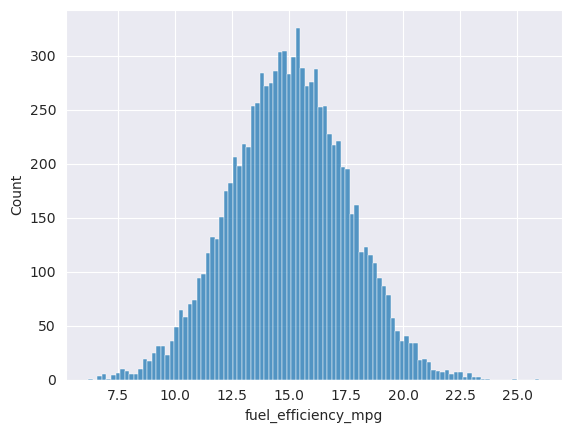

In [9]:
sns.histplot(x=prediction_data['fuel_efficiency_mpg'],bins=100)

In [10]:
prediction_data.isna().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [11]:
prediction_data['horsepower'].median()

149.0

In [16]:
n_train = int(len(prediction_data) * 0.6)
n_val =int(len(prediction_data) * 0.2)
n_test = int(len(prediction_data) - n_val - n_train)

In [22]:
## with shuffles
n = len(prediction_data)
print("Total Train records :",n)
idx = np.arange(n)
np.random.seed(42)
np.random.shuffle(idx)

df_train = prediction_data.iloc[idx[:n_train]]
df_val = prediction_data.iloc[idx[n_train:n_train+n_val]]
df_test = prediction_data.iloc[idx[n_train+n_val:]]

Total Train records : 9704


In [23]:
print(f'Train set size: {len(df_train)}')
print(f'Validation set size: {len(df_val)}')
print(f'Test set size: {len(df_test)}')

Train set size: 5822
Validation set size: 1940
Test set size: 1942


In [29]:
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

In [30]:
## remove msrp from data
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

In [31]:
df_train.isna().sum()

engine_displacement      0
horsepower             429
vehicle_weight           0
model_year               0
dtype: int64

In [46]:
df_train.dtypes

engine_displacement      int64
horsepower             float64
vehicle_weight         float64
model_year               int64
dtype: object

In [44]:
df_train['model_year'].min()

2000

In [47]:
def prepare_x_fillna_0(df: pd.DataFrame):
    df = df.copy()
    df['model_year'] = df['model_year'] -df['model_year'].min()
    df['horsepower'] = df['horsepower'].fillna(0)
    X = df.values
    return X

def prepare_x_fillna_mean(df: pd.DataFrame):
    df = df.copy()
    df['model_year'] = df['model_year'] -df['model_year'].min()
    df['horsepower'] = df['horsepower'].fillna(df['horsepower'].mean())
    X = df.values
    return X

In [51]:
df_train

,engine_displacement,horsepower,vehicle_weight,model_year
483,220,144.0,2535.887591,2009
7506,160,141.0,2741.170484,2019
8795,230,155.0,2471.880237,2017
1688,150,206.0,3748.164469,2015
6217,300,111.0,2135.716359,2006
...,...,...,...,...
8387,160,111.0,3038.134712,2002
7331,160,157.0,2877.624938,2006
1696,260,139.0,2606.972984,2009
5685,280,132.0,4004.214323,2014


In [36]:
# np.mean(df_train.horsepower)

np.float64(149.54348229185982)

In [37]:
# df_train_t1['horsepower'] = df_train_t1['horsepower'].fillna(0)
# df_train_t2['horsepower'] = df_train_t2['horsepower'].fillna(df_train_t2['horsepower'].mean())

In [40]:
# df_train_t2.isna().sum()

engine_displacement    0
horsepower             0
vehicle_weight         0
model_year             0
dtype: int64

In [52]:
X_0 = prepare_x_fillna_0(df_train)

In [54]:
X_mean = prepare_x_fillna_mean(df_train)

In [55]:
X_mean

array([[ 220.        ,  144.        , 2535.88759124,    9.        ],
       [ 160.        ,  141.        , 2741.17048439,   19.        ],
       [ 230.        ,  155.        , 2471.88023726,   17.        ],
       ...,
       [ 260.        ,  139.        , 2606.9729844 ,    9.        ],
       [ 280.        ,  132.        , 4004.21432295,   14.        ],
       [ 210.        ,  152.        , 2500.17568746,   20.        ]],
      shape=(5822, 4))

In [56]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [57]:
def calculate_rmse(y,y_pred):
    e = y-y_pred
    se = e**2
    mse = se.mean()
    return np.sqrt(mse)

In [66]:
w0,w = train_linear_regression(X_0,y_train)
X_val_0 = prepare_x_fillna_0(df_val)
y_pred_0 = w0 + X_val_0.dot(w)
calculate_rmse(y_val, y_pred_0)

np.float64(0.5171866956560169)

In [64]:
y_pred_0

array([18.78263838, 17.86547128, 16.0373571 , ..., 13.21262979,
       16.30029283, 13.69553919], shape=(1940,))

In [67]:
w0,w = train_linear_regression(X_mean,y_train)
X_val_mean = prepare_x_fillna_0(df_val)
y_pred_mean = w0 + X_val_mean.dot(w)
calculate_rmse(y_val, y_pred_mean)

np.float64(0.6116417161857316)

In [69]:
r = [0, 0.01, 0.1, 1, 5, 10, 100]

In [68]:
def train_linear_regression_reg(X,y,r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r*np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [77]:
rmse_list = {'r':[],'RMSE':[]}
for i in r:
    w0,w = train_linear_regression_reg(X_0,y_train,r=i)
    y_pred_0 = w0 + X_val_0.dot(w)
    rmse = calculate_rmse(y_val, y_pred_0)

    rmse_list['r'].append(i)
    rmse_list['RMSE'].append(rmse)
    print(f'RMSE for r={i} : {rmse}')
results_rmse = pd.DataFrame(data=rmse_list)

RMSE for r=0 : 0.5171866956560169
RMSE for r=0.01 : 0.5171780117742858
RMSE for r=0.1 : 0.5171162815149248
RMSE for r=1 : 0.5180882828135707
RMSE for r=5 : 0.5525054641105889
RMSE for r=10 : 0.6410251046077899
RMSE for r=100 : 2.0812986683435626


In [84]:
results_rmse.sort_values(by='RMSE', ascending=True, inplace=True)

In [85]:
results_rmse

,r,RMSE
2,0.10,0.517116
1,0.01,0.517178
0,0.00,0.517187
3,1.00,0.518088
4,5.00,0.552505
5,10.00,0.641025
6,100.00,2.081299


In [97]:
split_seed = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [100]:
def splitData(df,seed):
    n_train = int(len(df) * 0.6)
    n_val =int(len(df) * 0.2)
    n_test = int(len(df) - n_val - n_train)

    n = len(df)

    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)

    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]

    return df_train, df_val, df_test

In [93]:
def prepare_x_fillna_0(df: pd.DataFrame):
    df = df.copy()
    df['model_year'] = df['model_year'] -df['model_year'].min()
    df['horsepower'] = df['horsepower'].fillna(0)
    X = df.values
    return X


In [94]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack((ones, X))

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)

    return w_full[0], w_full[1:]

In [95]:
def calculate_rmse(y,y_pred):
    e = y-y_pred
    se = e**2
    mse = se.mean()
    return np.sqrt(mse)

In [102]:
rmse_list = []
for i in split_seed:
    print(i)
    df_train, df_val, df_test = splitData(prediction_data,i)
    y_train = df_train['fuel_efficiency_mpg'].values
    y_val = df_val['fuel_efficiency_mpg'].values
    y_test = df_test['fuel_efficiency_mpg'].values

    # delete
    del df_train['fuel_efficiency_mpg']
    del df_val['fuel_efficiency_mpg']
    del df_test['fuel_efficiency_mpg']

    X = prepare_x_fillna_0(df_train)
    # train model
    w0,w = train_linear_regression(X,y_train)

    # predict for validation data
    X_val = prepare_x_fillna_0(df_val)
    y_pred = w0 + X_val.dot(w)

    # calculate RMSE
    rmse = calculate_rmse(y_val, y_pred)
    rmse_list.append(rmse)

rmse_list = np.array(rmse_list)

0
1
2
3
4
5
6
7
8
9


In [104]:
rmse_list.std()

np.float64(0.007126319128873299)

In [116]:
df_train, df_val, df_test = splitData(prediction_data,9)
y_train = df_train['fuel_efficiency_mpg'].values
y_val = df_val['fuel_efficiency_mpg'].values
y_test = df_test['fuel_efficiency_mpg'].values

# delete
del df_train['fuel_efficiency_mpg']
del df_val['fuel_efficiency_mpg']
del df_test['fuel_efficiency_mpg']

df_full_train = pd.concat([df_train,df_val],axis=0)
y_full_train = np.concatenate([y_train,y_val])

X_full_train = prepare_x_fillna_0(df_full_train)
w0,w = train_linear_regression_reg(X_full_train,y_full_train,r=0.001)

X_test = prepare_x_fillna_0(df_test)
y_pred = w0 + X_test.dot(w)

rmse = calculate_rmse(y_test, y_pred)

In [117]:
print(rmse)

0.5154905466773215


In [114]:
type(y_full_train)

numpy.ndarray

(np.float64(29.531532595538774),
 array([ 1.63443072e-05,  3.56602870e-03, -5.01720602e-03,  1.13258259e-03]))